In [ ]:
!wget https://purr.purdue.edu/publications/1947/serve/1?render=archive
!unzip /content/1?render=archive
!unzip /content/10_4231_R7RX991C/bundle.zip

--2022-10-22 11:56:51--  https://purr.purdue.edu/publications/1947/serve/1?render=archive
Resolving purr.purdue.edu (purr.purdue.edu)... 132.249.202.162
Connecting to purr.purdue.edu (purr.purdue.edu)|132.249.202.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333827238 (1.2G) [application/zip]
Saving to: ‘1?render=archive’

1?render=archive    100%[===================>]   1.24G  56.0MB/s    in 24s     

2022-10-22 11:57:16 (52.5 MB/s) - ‘1?render=archive’ saved [1333827238/1333827238]

Archive:  /content/1?render=archive
  inflating: 10_4231_R7RX991C/bundle.zip  
  inflating: 10_4231_R7RX991C/documentation/Calibration_Information_for_220_Channel_Data_Band_Set.txt  
  inflating: 10_4231_R7RX991C/ground_reference_photos/field_3-04a.tif  
  inflating: 10_4231_R7RX991C/ground_reference_photos/field_3-04b.tif  
  inflating: 10_4231_R7RX991C/ground_reference_photos/field_3-04c.tif  
  inflating: 10_4231_R7RX991C/ground_reference_photos/field_3-04d.tif  
  infl

In [ ]:
import gdal

f = gdal.Open("/content/aviris_hyperspectral_data/19920612_AVIRIS_IndianPine_EW-line_R.tif")
fi = open("/content/10_4231_R7RX991C/documentation/Calibration_Information_for_220_Channel_Data_Band_Set.txt")
fi.readlines()

['Information on 220 Channel\n',
 'AVIRIS Data Set\n',
 'Location\n',
 '\n',
 'This data is from the AVIRIS (Airborne Visible/Infrared Imaging Spectrometer) built by JPL and flown by NASA/Ames on June 12, 1992. The scene is over an area 6 miles west of West Lafayette. The scene is a subset of a significantly larger image file.\n',
 '\n',
 'These data are calibrated data. In other words the data values in the scene are proportional to radiance. 1000 has been added to the calibrated data so that all data values in this scene are positive. To convert the scene data values (SDV) to radiance values (RV), one must first subtact 1000 and then divide by the gain_factor that JPL used which is 500.\n',
 '\n',
 'RV = (SDV-1000) / 500.\n',
 '\n',
 'The RV units are W * cm^-2 * nm^-1 * sr^-1.\n',
 '\n',
 'This information is dated November 1992. It came with the tape documentation from JPL for this AVIRIS data.\n',
 'Spectral Calibration\n',
 '\n',
 'FWHM = Full Width Half Maximum. In other words i

In [ ]:
# 409.8 - For water (2)
# 830 - For NIR (47)
# 1600, 2200 - FOR MIR(133, 190)

import numpy as np

data_list = []
for i in [2, 47, 133, 190]:
  data_list.append(np.expand_dims(f.GetRasterBand(i).ReadAsArray(), axis = 0))
data = np.vstack(data_list).reshape((4, -1)).T

In [15]:
data.shape

(1134672, 4)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale before using kmeans
sc = StandardScaler()
data = sc.fit_transform(data)

km = KMeans(n_clusters = 5)
result = km.fit_predict(data)

In [ ]:
# convert into an image
image = result.reshape((614, 1848))

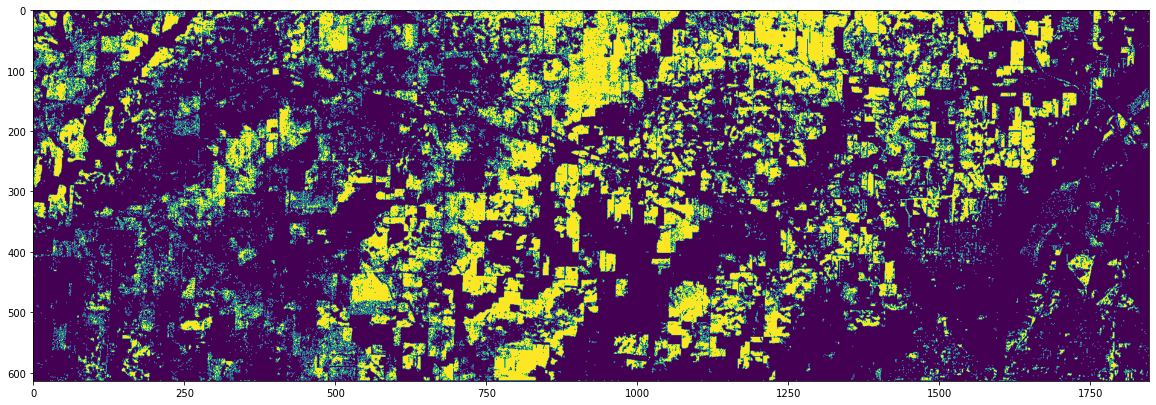

In [ ]:
plt.figure(figsize = (20, 60))
plt.imshow(image == 0)
plt.show()

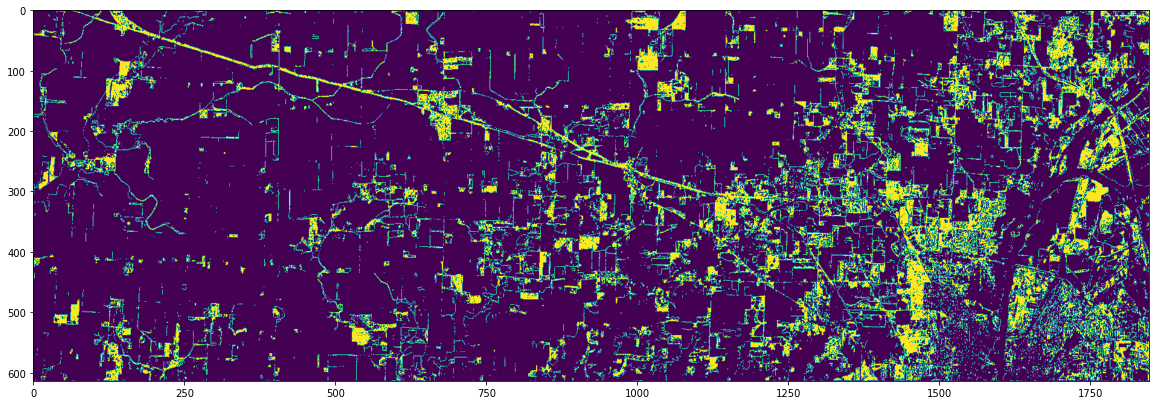

In [ ]:
plt.figure(figsize = (20, 60))
plt.imshow(image == 1)
plt.show()

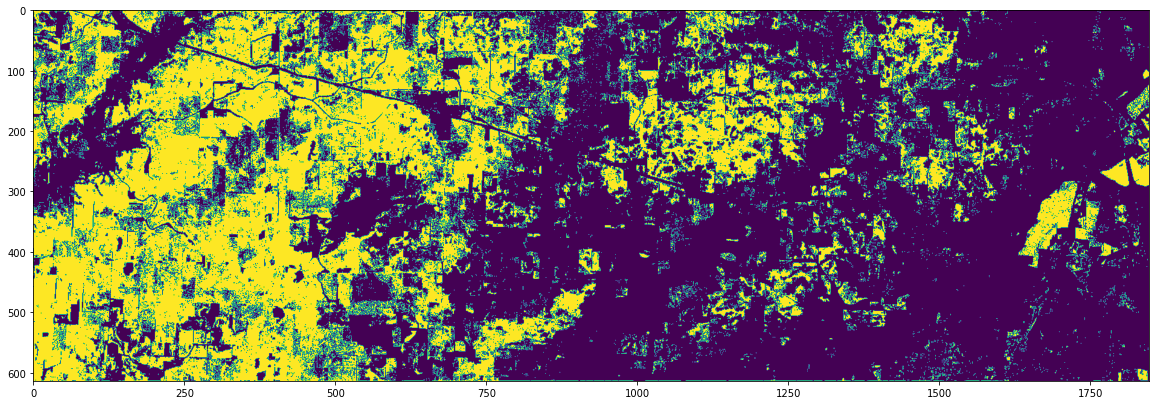

In [ ]:
plt.figure(figsize = (20, 60))
plt.imshow(image == 2)
plt.show()

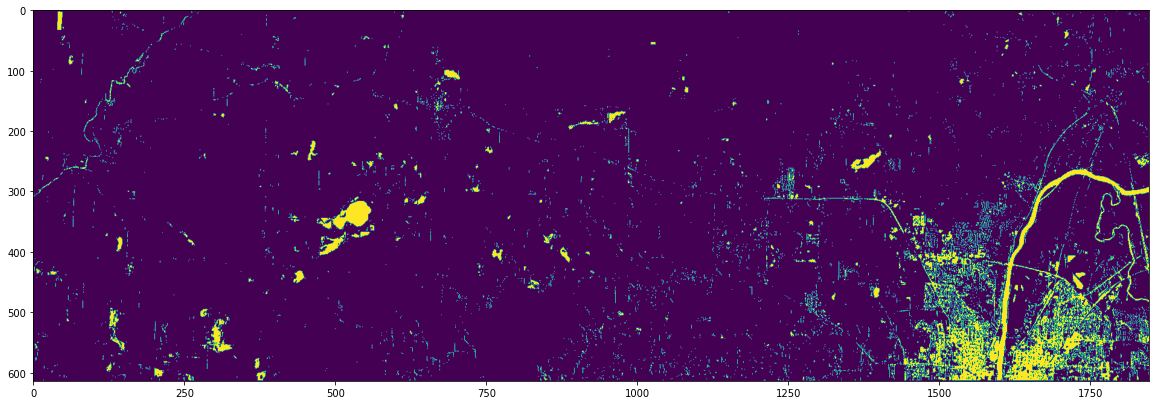

In [ ]:
plt.figure(figsize = (20, 60))
plt.imshow(image == 3)
plt.show()

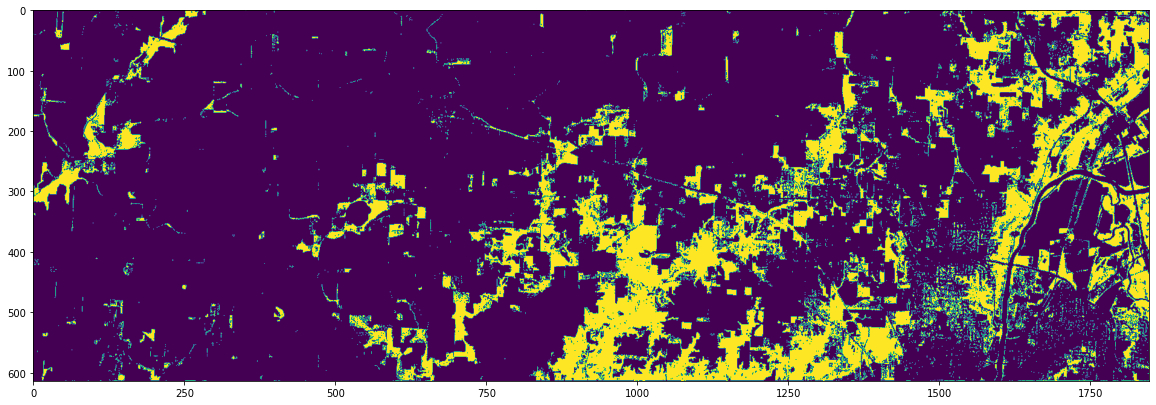

In [ ]:
plt.figure(figsize = (20, 60))
plt.imshow(image == 4)
plt.show()

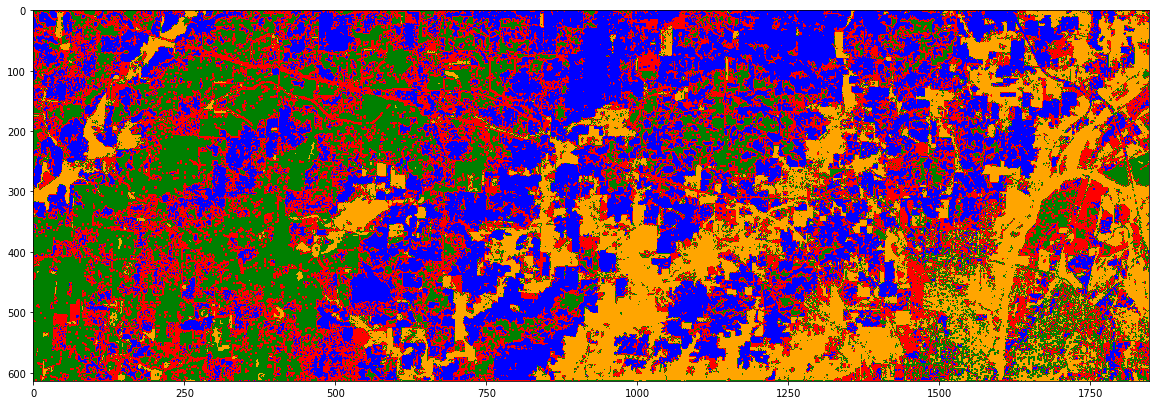

In [ ]:
from matplotlib.colors import ListedColormap

map = ["blue", "red", "green", "orange"]
cmap = ListedColormap(map)

plt.figure(figsize = (20, 60))

plt.imshow(image, cmap = cmap)